In [1]:
from compare_HPO_methods import create_scores_dict, compare_method,plot_scores_aggregated_tasks_per_tuning_method,normalize_scores
import pandas as pd
import numpy as np
from joblib import dump, load

In [2]:
# scores_NL, scores_MD, scores_J, names = create_scores_dict(False,False)
# scores_NL_class, scores_MD_class, scores_J_class, names_class = create_scores_dict(True,False)
#RMSE_NL, RMSE_MD, RMSE_J, _ = create_scores_dict(False,True)

In [3]:
# scores = [scores_NL,scores_MD, scores_J]
# scores_class = [scores_NL_class,scores_MD_class, scores_J_class]
# RMSE = [RMSE_NL,RMSE_MD, RMSE_J]
# dump(scores,'Final_DATA/scores.joblib')
# dump(scores_class,'Final_DATA/scores_class.joblib')
# dump(RMSE, 'Final_DATA/RSME.joblib')
# dump(names_class, 'Final_DATA/names_class.joblib')
# dump(names, 'Final_DATA/names.joblib')


In [4]:
# Shape: scores = [scores_NL,scores_MD, scores_J], where scores_NL = [scores_random_search, scores_tpe, scores_gp_Bo, scores_Hyperband, scores_SMAC]
scores = load('Final_DATA/scores.joblib') 
scores_class = load('Final_DATA/scores_class.joblib')
RMSE = load('Final_DATA/RSME.joblib')
names = load('Final_DATA/names.joblib')
names_class = load('Final_DATA/names_class.joblib')

In [5]:
for i in range(3):
    for j in range(5):
        if i != 0 and j!=0:
            all_scores = np.concatenate((all_scores, RMSE[i][j]),axis = 0)
        else:
            all_scores = RMSE[i][j]

print((RMSE[0][0]-np.mean(all_scores, axis=(0,2))[np.newaxis, :, np.newaxis])/(np.std(all_scores, axis=(0,2))[np.newaxis, :, np.newaxis]))

[[[ 1.12086390e+01  5.98063044e+00  5.07760543e+00 ...  1.57012120e+00
    5.84454107e+00  3.99883854e+00]
  [ 1.62661441e+01  1.46523351e+01  6.63813564e+00 ...  1.67514715e+01
    1.35200687e+01  1.38583209e+01]
  [ 2.40089089e+00  3.42353668e+00  3.25225496e-03 ...  2.01424325e+00
    3.04119019e+00  3.44461310e+00]
  ...
  [ 3.42851963e+00  2.52088683e+00  2.93637334e+00 ...  4.83109945e+00
    2.91808806e+00  2.89789265e+00]
  [ 8.13594705e+00  3.06175345e+00  3.84109316e-01 ...  2.04992900e+00
    4.78892099e+00  5.62666314e+00]
  [ 4.48469497e+00  9.25285547e+00  1.14462575e+00 ...  4.03184714e+00
    8.81776680e+00  8.06523608e+00]]

 [[ 1.12086390e+01  3.39159436e+00  4.56380457e-01 ...  1.57012120e+00
    5.84454107e+00  3.99883854e+00]
  [ 1.62661441e+01 -1.37979271e-01  3.41566437e-01 ...  1.67514715e+01
    1.35200687e+01  1.38583209e+01]
  [ 2.40089089e+00 -8.80008049e-02  3.25225496e-03 ...  2.01424325e+00
    3.04119019e+00  3.44461310e+00]
  ...
  [ 3.10493475e+00  1.9

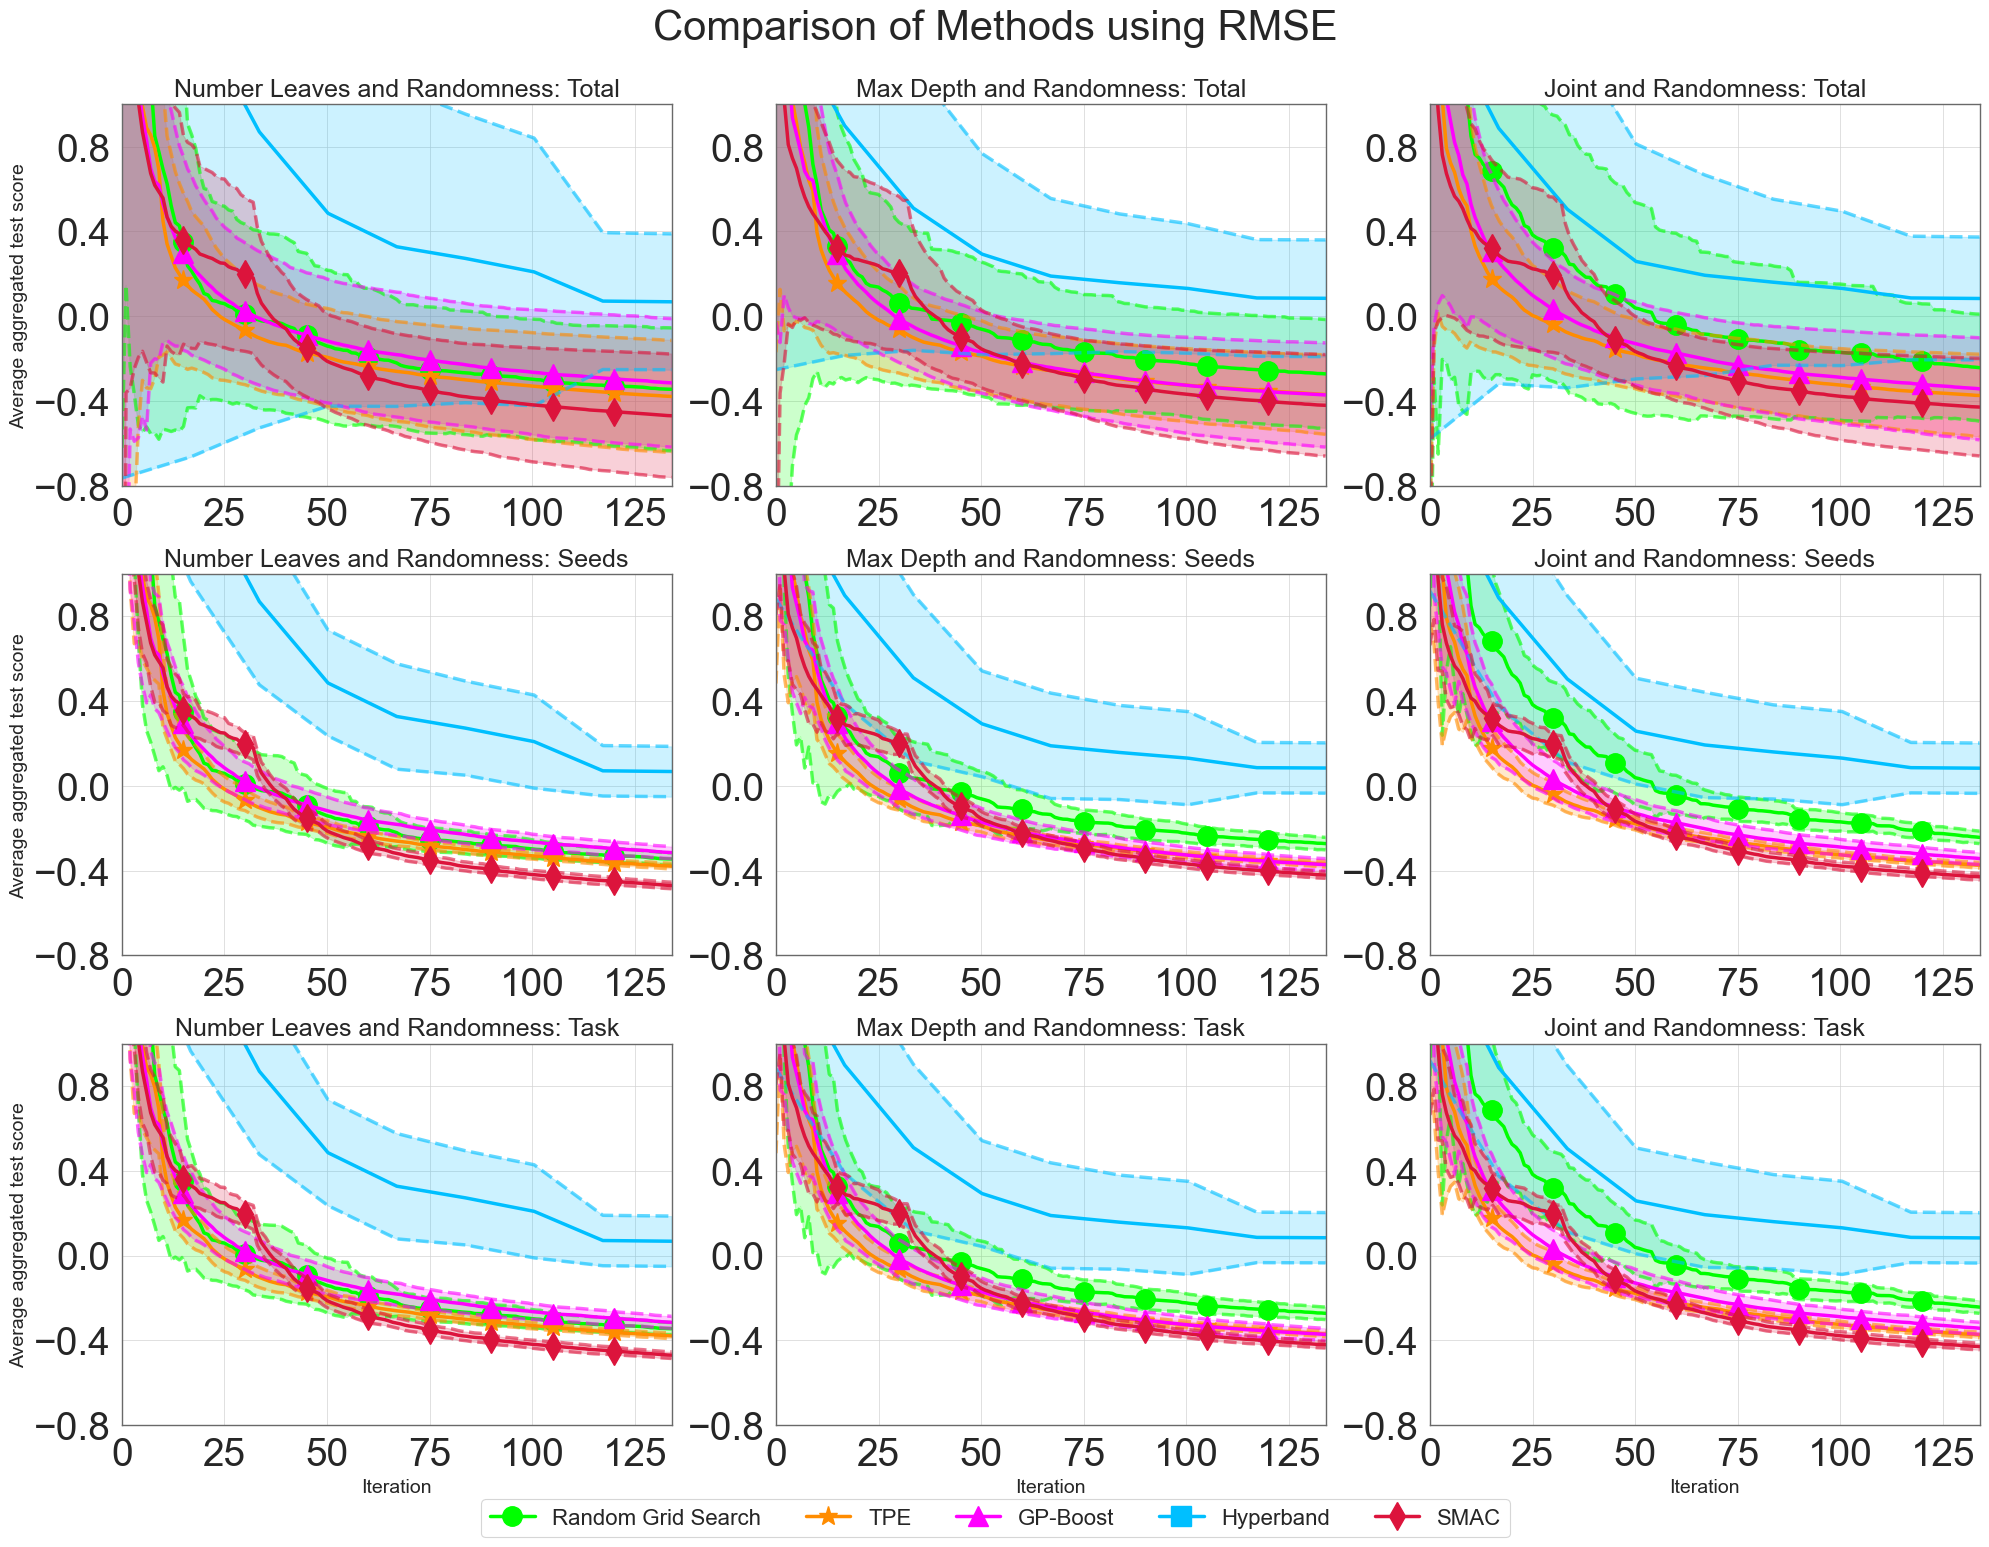

In [6]:
#compare_method(scores, False, False, False)
# compare_method(scores_class, True, False)
compare_method(RMSE, False, True, False)

(135,)
(135,)
(135,)


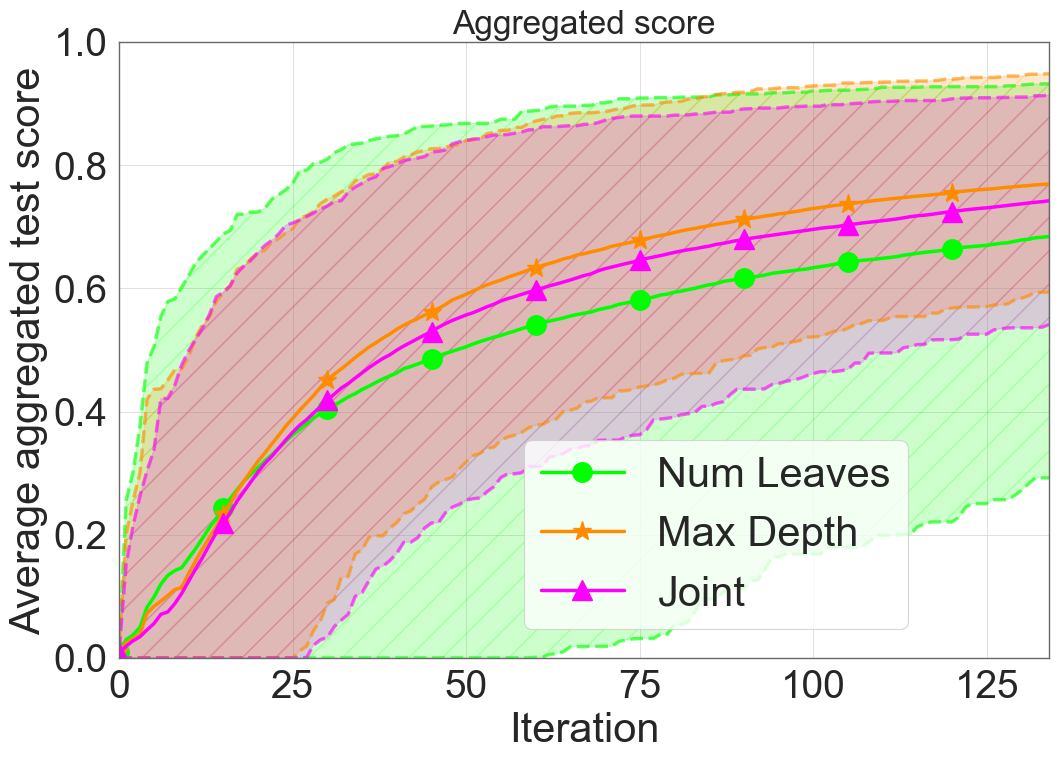

In [7]:
plot_scores_aggregated_tasks_per_tuning_method(scores,METHOD='gp_bo', classification=False, adtm = True, confidence_interval=True, randomness=0)